In [11]:
import cv2
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tensorflow as tf
import keras

In [12]:
model = keras.models.load_model("isl_classifier.h5")

In [37]:
labels_dict = {0:'1', 
                 1:'2', 
                 2:'3', 
                 3:'4', 
                 4:'5', 
                 5:'6',
                 6:'7',
                 7:'8',
                 8:'9',
                 9:'A',
                 10:'B',
                 11:'C',
                 12:'D',
                 13:'E',
                 14:'F',
                 15:'G',
                 16:'H',
                 17:"I",
                 18:'J',
                 19:'K',
                 20:'L', 
                 21:'M', 
                 22:'N',
                 23:'O',
                 24:'P',
                 25:'Q',
                 26:'R',
                 27:'S',
                 28:'T',
                 29:'U',
                 30:'V',
                 31:'W',
                 32:'X',
                 33:'Y',
                 34:'Z'}
color_dict=(0,255,0)
x=0
y=0
w=64
h=64

In [60]:
import os
img_size=128
minValue = 70
img_size=128
minValue = 70
count1 = 0
im_count = 1
data = []
target = []
d = r"C:\Users\suren\DSPProject\Validation\GoodMorning"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        count1 += 1
string = " "
count = 0
prev = " "
prev_val = 0

im_count = 1
while(count1!=0):
    di = d
    di1 = di + "/" + str(im_count) + ".jpg "
    count1= count1-1
    im_count = im_count+1
    img = cv2.imread(di1)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    resized=cv2.resize(res,(img_size,img_size))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,img_size,img_size,1))
    data.append(resized)
    result = model.predict(reshaped)
    print(tf.argmax(result,1))
    label=np.argmax(result,axis=1)[0]
    prev= labels_dict[label]
    if(label == 0):
        string = string + " "
    else:
        string = string + prev

print(string)
from gtts import gTTS 
language = 'en'
myobj = gTTS(text=string, lang=language, slow=False) 
myobj.save("texttospeech.mp3") 
os.system("texttospeech.mp3")

tf.Tensor([15], shape=(1,), dtype=int64)
tf.Tensor([23], shape=(1,), dtype=int64)
tf.Tensor([23], shape=(1,), dtype=int64)
tf.Tensor([12], shape=(1,), dtype=int64)
tf.Tensor([21], shape=(1,), dtype=int64)
tf.Tensor([23], shape=(1,), dtype=int64)
tf.Tensor([26], shape=(1,), dtype=int64)
tf.Tensor([22], shape=(1,), dtype=int64)
tf.Tensor([17], shape=(1,), dtype=int64)
tf.Tensor([22], shape=(1,), dtype=int64)
tf.Tensor([15], shape=(1,), dtype=int64)
 GOODMORNING


0

In [43]:
datanp=np.array(data)
target = np.load(r"C:\Users\suren\DSPProject\target.npy")
datanp.shape

(11, 128, 128)

In [46]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
print(target.shape)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

(35280, 35)


In [45]:
new_target.shape

(35280, 35, 2)

In [47]:
np.save('test_img',data)
np.save('testtarget',new_target)

In [50]:
data=np.load('test_img.npy')
target=np.load('testtarget.npy')

In [15]:
from gtts import gTTS 
language = 'en'
myobj = gTTS(text=string, lang=language, slow=False) 
myobj.save("texttospeech.mp3") 
os.system("texttospeech.mp3")

0

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

In [16]:
raw = wave.open(r"C:\Users\suren\DSPProject\texttospeech.wav")

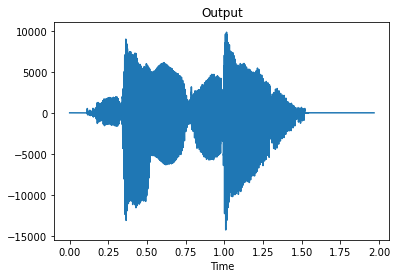

In [17]:
signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
f_rate = raw.getframerate()
time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
plt.figure(1)
plt.title("Output")
plt.xlabel("Time")
plt.plot(time, signal)
plt.show()

In [51]:
y_pred = model.predict(data)

In [52]:
y_pred

array([[7.4027889e-07, 4.9115588e-06, 1.7193142e-07, 1.1463270e-06,
        1.5511771e-04, 1.7188542e-08, 9.2256072e-05, 4.1595502e-08,
        3.3401701e-08, 3.1081021e-07, 1.2119230e-05, 2.3008636e-04,
        2.6756735e-04, 4.0643072e-01, 5.3703036e-05, 1.7968244e-06,
        3.9257418e-02, 2.1377627e-07, 4.6643596e-02, 1.6296834e-04,
        2.4498520e-05, 1.2581718e-04, 8.0125952e-05, 6.0674473e-08,
        2.2045514e-04, 3.0682964e-05, 5.5501070e-03, 1.1346114e-02,
        4.8929828e-01, 4.4951062e-06, 3.3668940e-08, 1.9454049e-07,
        1.2088266e-06, 2.7111946e-06, 2.5205344e-07],
       [7.4027889e-07, 4.9115588e-06, 1.7193142e-07, 1.1463270e-06,
        1.5511771e-04, 1.7188542e-08, 9.2256072e-05, 4.1595502e-08,
        3.3401701e-08, 3.1081021e-07, 1.2119230e-05, 2.3008636e-04,
        2.6756735e-04, 4.0643072e-01, 5.3703036e-05, 1.7968244e-06,
        3.9257418e-02, 2.1377627e-07, 4.6643596e-02, 1.6296834e-04,
        2.4498520e-05, 1.2581718e-04, 8.0125952e-05, 6.0674473

In [54]:
import tensorflow as tf
con_mat = tf.math.confusion_matrix(labels=tf.argmax(target,1), predictions=tf.argmax(y_pred,1)).numpy()

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [35280,2] != values[1].shape = [11] [Op:Pack] name: stack